#Description of the problem

Now we are going to predict and analyse the price of buildings in madrid. After doing a web scraping we will show the data and basic statistics of it. We will use the tools studied during the course, such as seaborn, matplotlib or pandas.

Description of the data: We have aprox 20.000 different buildings and we are going to predict the label, which is the price. We observe some basic caracteristics and we observe that some of the features employed are the number of rooms, the crime rate per area, the height, the area and the numbers from 0 to 134 are the different neighbourhoods of Madrid

Introduction where you discuss the business problem and who would be interested in this project.

**It would be interesting for real estate investors, it will help to predict the price of the buildings**

Data where you describe the data that will be used to solve the problem and the source of the data.


** The data is described above and also here: We have aprox 20.000 different buildings and we are going to predict the label, which is the price. We observe some basic caracteristics and we observe that some of the features employed are the number of rooms, the crime rate per area, the height, the area and the numbers from 0 to 134 are the different neighbourhoods of Madrid**

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.


** The description of the data is shown by using describe(). Also explanatory data analysis is observable and it is important to delete anomalies that could negatively affect the result of the prediction. The method used is neural networks**




Results section where you discuss the results.
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
Conclusion section where you conclude the report.

**We observe the results, obtaining a quite gaussian distribution**

**the conclusion is that using web scraping and this kind of analysis we can predict the price per area in madrid**




In [ ]:
# Use seaborn for pairplot
!pip install seaborn

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [ ]:
from google.colab import files

files.upload()


Saving prueba7.csv to prueba7.csv


{'prueba7.csv': b'385000,4,110,2,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,54478.58,2996,233791\r\n945000,4,210,3,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,54478.58,2996,233791\r\n328000,2,80,6,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,54478.58,2996,233791\r\n715000,5,160,8,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0

In [ ]:
archivo = "prueba7.csv"
#cols = ["price", "rooms", "area", "height","zip","zop"]#,"crimen", "ingreso medio","precio m2","habitantes"]
#cols = ["price", "rooms", "area", "height","zip","crimen", "ingreso medio","precio m2","habitantes","zip1","zop"]
#cols = ["price", "rooms", "area", "height", "zip","crimen", "ingreso medio","precio m2","habitantes","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","10","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133"]
cols = ["price", "rooms", "area","height","0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41","42","43","44","45","46","47","48","49","50","51","52","53","54","55","56","57","58","59","60","61","62","63","64","65","66","67","68","69","70","71","72","73","74","75","76","77","78","79","80","81","82","83","84","85","86","87","88","89","90","91","92","93","94","95","96","97","98","99","10","101","102","103","104","105","106","107","108","109","110","111","112","113","114","115","116","117","118","119","120","121","122","123","124","125","126","127","128","129","130","131","132","133","134","crimen", "ingreso medio","precio m2","habitantes"]

raw_dataset = pd.read_csv(archivo, names=cols, dtype=np.float64)
dataset = raw_dataset.copy()
#dataset.tail()'''

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:702: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [ ]:
dataset_stats = dataset.describe()
dataset_stats = dataset_stats.transpose()
dataset_stats

In [ ]:
dataset.isna().sum()
dataset = dataset.dropna()

In [ ]:
dataset_stats = dataset.describe()
dataset_stats = dataset_stats.transpose()
dataset_stats

count           mean  ...        75%          max
price          19845.0  570113.477450  ...  675000.00  11250000.00
rooms          19845.0       2.813202  ...       3.00        18.00
area           19845.0     123.096699  ...     143.00      5233.00
height         19845.0       2.939330  ...       4.00        32.00
0              19845.0       0.026505  ...       0.00         1.00
1              19845.0       0.028219  ...       0.00         1.00
2              19845.0       0.032351  ...       0.00         1.00
3              19845.0       0.023180  ...       0.00         1.00
4              19845.0       0.027715  ...       0.00         1.00
5              19845.0       0.020055  ...       0.00         1.00
6              19845.0       0.014311  ...       0.00         1.00
7              19845.0       0.015067  ...       0.00         1.00
8              19845.0       0.016830  ...       0.00         1.00
9              19845.0       0.023432  ...       0.00         1.00
10             19845.0       0.017133  ...       0.00         1.00
11             19845.0       0.017889  ...       0.00         1.00
12             19845.0       0.024238  ...       0.00         1.00
13             19845.0       0.027160  ...       0.00         1.00
14             19845.0       0.021920  ...       0.00         1.00
15             19845.0       0.023986  ...       0.00         1.00
16             19845.0       0.018745  ...       0.00         1.00
17             19845.0       0.023633  ...       0.00         1.00
18             19845.0       0.002116  ...       0.00         1.00
19             19845.0       0.022373  ...       0.00         1.00
20             19845.0       0.014865  ...       0.00         1.00
21             19845.0       0.011237  ...       0.00         1.00
22             19845.0       0.021416  ...       0.00         1.00
23             19845.0       0.018040  ...       0.00         1.00
24             19845.0       0.065054  ...       0.00         1.00
25             19845.0       0.059058  ...       0.00         1.00
...                ...            ...  ...        ...          ...
109            19845.0       0.040766  ...       0.00         1.00
110            19845.0       0.044092  ...       0.00         1.00
111            19845.0       0.034618  ...       0.00         1.00
112            19845.0       0.034669  ...       0.00         1.00
113            19845.0       0.033006  ...       0.00         1.00
114            19845.0       0.048576  ...       0.00         1.00
115            19845.0       0.028370  ...       0.00         1.00
116            19845.0       0.031293  ...       0.00         1.00
117            19845.0       0.026606  ...       0.00         1.00
118            19845.0       0.042177  ...       0.00         1.00
119            19845.0       0.045956  ...       0.00         1.00
120            19845.0       0.032300  ...       0.00         1.00
121            19845.0       0.022172  ...       0.00         1.00
122            19845.0       0.037138  ...       0.00         1.00
123            19845.0       0.035374  ...       0.00         1.00
124            19845.0       0.016024  ...       0.00         1.00
125            19845.0       0.032552  ...       0.00         1.00
126            19845.0       0.025447  ...       0.00         1.00
127            19845.0       0.020257  ...       0.00         1.00
128            19845.0       0.024389  ...       0.00         1.00
129            19845.0       0.059713  ...       0.00         1.00
130            19845.0       0.038498  ...       0.00         1.00
131            19845.0       0.057798  ...       0.00         1.00
132            19845.0       0.025397  ...       0.00         1.00
133            19845.0       0.026909  ...       0.00         1.00
134            19845.0       0.049332  ...       0.00         1.00
crimen         19845.0       0.617939  ...       1.00         1.00
ingreso medio  19845.0   42471.071212  ...   56606.33     69915.

In [ ]:
dataset=dataset[dataset.area <1000]

In [ ]:
dataset = dataset.drop(dataset[(dataset['area']>400) 
                         & (dataset['price']>8000000)].index).reset_index(drop=True)

In [ ]:
dataset = dataset.drop(dataset[(dataset['height']>25) 
                         & (dataset['price']<2000200)].index).reset_index(drop=True)

In [ ]:
dataset = dataset.drop(dataset[(dataset['height']<10) 
                         & (dataset['price']>10000000)].index).reset_index(drop=True)

In [ ]:
dataset = dataset.drop(dataset[(dataset['rooms']>10) 
                         & (dataset['price']<10000000)].index).reset_index(drop=True)

In [ ]:
dataset=dataset[dataset.rooms <=10]

In [ ]:
'''dataset=dataset[dataset.price <875000] #pruebe
dataset=dataset[dataset.area <150]
dataset=dataset[dataset.height <12]
dataset=dataset[dataset.rooms <8]'''
#dataset=dataset[dataset.price<672000]

#restriccion 1
dataset=dataset[dataset.price<1250000]

dataset = dataset.drop(dataset[(dataset['area']>400) 
                         & (dataset['price']<1000000)].index).reset_index(drop=True)
dataset = dataset.drop(dataset[(dataset['area']>575) 
                         & (dataset['price']<2000000)].index).reset_index(drop=True)
dataset = dataset.drop(dataset[(dataset['area']<400) 
                         & (dataset['price']>3500000)].index).reset_index(drop=True)
dataset = dataset.drop(dataset[(dataset['area']<600) 
                         & (dataset['price']>4500000)].index).reset_index(drop=True)
dataset = dataset.drop(dataset[(dataset['area']<800) 
                         & (dataset['price']>5750000)].index).reset_index(drop=True)
dataset = dataset.drop(dataset[(dataset['area']<850) 
                         & (dataset['price']>6750000)].index).reset_index(drop=True)
#restriccion 2
dataset=dataset[dataset.rooms<11]
dataset = dataset.drop(dataset[(dataset['rooms']>2) 
                         & (dataset['price']>4750000)].index).reset_index(drop=True)
#restriccion3 
dataset=dataset[dataset.height<15]


In [ ]:
dataset_stats = dataset.describe()
dataset_stats = dataset_stats.transpose()
dataset_stats

count           mean  ...        75%         max
price          19810.0  566171.577991  ...  673900.00  7100000.00
rooms          19810.0       2.798132  ...       3.00       10.00
area           19810.0     122.298132  ...     143.00      894.00
height         19810.0       2.937355  ...       4.00       22.00
0              19810.0       0.026552  ...       0.00        1.00
1              19810.0       0.028269  ...       0.00        1.00
2              19810.0       0.032408  ...       0.00        1.00
3              19810.0       0.023221  ...       0.00        1.00
4              19810.0       0.027764  ...       0.00        1.00
5              19810.0       0.020091  ...       0.00        1.00
6              19810.0       0.014336  ...       0.00        1.00
7              19810.0       0.015093  ...       0.00        1.00
8              19810.0       0.016860  ...       0.00        1.00
9              19810.0       0.023473  ...       0.00        1.00
10             19810.0       0.017163  ...       0.00        1.00
11             19810.0       0.017920  ...       0.00        1.00
12             19810.0       0.024281  ...       0.00        1.00
13             19810.0       0.027208  ...       0.00        1.00
14             19810.0       0.021959  ...       0.00        1.00
15             19810.0       0.024028  ...       0.00        1.00
16             19810.0       0.018778  ...       0.00        1.00
17             19810.0       0.023675  ...       0.00        1.00
18             19810.0       0.002120  ...       0.00        1.00
19             19810.0       0.022413  ...       0.00        1.00
20             19810.0       0.014891  ...       0.00        1.00
21             19810.0       0.011257  ...       0.00        1.00
22             19810.0       0.021454  ...       0.00        1.00
23             19810.0       0.018072  ...       0.00        1.00
24             19810.0       0.064967  ...       0.00        1.00
25             19810.0       0.058506  ...       0.00        1.00
...                ...            ...  ...        ...         ...
109            19810.0       0.040838  ...       0.00        1.00
110            19810.0       0.044170  ...       0.00        1.00
111            19810.0       0.034679  ...       0.00        1.00
112            19810.0       0.034730  ...       0.00        1.00
113            19810.0       0.033064  ...       0.00        1.00
114            19810.0       0.048662  ...       0.00        1.00
115            19810.0       0.028420  ...       0.00        1.00
116            19810.0       0.031348  ...       0.00        1.00
117            19810.0       0.026653  ...       0.00        1.00
118            19810.0       0.042251  ...       0.00        1.00
119            19810.0       0.046037  ...       0.00        1.00
120            19810.0       0.032357  ...       0.00        1.00
121            19810.0       0.022211  ...       0.00        1.00
122            19810.0       0.037203  ...       0.00        1.00
123            19810.0       0.035437  ...       0.00        1.00
124            19810.0       0.016052  ...       0.00        1.00
125            19810.0       0.032509  ...       0.00        1.00
126            19810.0       0.025492  ...       0.00        1.00
127            19810.0       0.020192  ...       0.00        1.00
128            19810.0       0.024331  ...       0.00        1.00
129            19810.0       0.059717  ...       0.00        1.00
130            19810.0       0.038415  ...       0.00        1.00
131            19810.0       0.057698  ...       0.00        1.00
132            19810.0       0.025442  ...       0.00        1.00
133            19810.0       0.026805  ...       0.00        1.00
134            19810.0       0.049218  ...       0.00        1.00
crimen         19810.0       0.617688  ...       1.00        1.00
ingreso medio  19810.0   42477.656985  ...   56606.33    69915.64
precio m2      19810.0    3238.917668  ...    4307.00    

In [ ]:
#dataset=dataset[dataset.zop ==9]

In [ ]:
#dataset=dataset.drop(columns="zop")
#dataset=dataset.drop(columns="zip1")

#dataset=dataset[dataset.price <=500000]
#dataset=dataset[dataset.price >=100000]

In [ ]:
dataset

price  rooms   area  ...  ingreso medio  precio m2  habitantes
0      385000.0    4.0  110.0  ...       54478.58     2996.0    233791.0
1      945000.0    4.0  210.0  ...       54478.58     2996.0    233791.0
2      328000.0    2.0   80.0  ...       54478.58     2996.0    233791.0
3      715000.0    5.0  160.0  ...       54478.58     2996.0    233791.0
4      420000.0    4.0  121.0  ...       54478.58     2996.0    233791.0
5      309000.0    3.0   88.0  ...       54478.58     2996.0    233791.0
6      339000.0    3.0   93.0  ...       54478.58     2996.0    233791.0
7      740000.0    3.0  225.0  ...       54478.58     2996.0    233791.0
8      185000.0    3.0   73.0  ...       54478.58     2996.0    233791.0
9      259000.0    3.0   79.0  ...       54478.58     2996.0    233791.0
10     390000.0    4.0  117.0  ...       54478.58     2996.0    233791.0
11     419000.0    5.0  142.0  ...       54478.58     2996.0    233791.0
12     220000.0    2.0   69.0  ...       54478.58     2996.0    233791.0
13     270000.0    3.0   86.0  ...       54478.58     2996.0    233791.0
14     189000.0    3.0   79.0  ...       54478.58     2996.0    233791.0
15     289000.0    3.0   89.0  ...       54478.58     2996.0    233791.0
16     370000.0    4.0  101.0  ...       54478.58     2996.0    233791.0
17     230000.0    3.0   70.0  ...       54478.58     2996.0    233791.0
18     715000.0    4.0  160.0  ...       54478.58     2996.0    233791.0
19     399000.0    3.0  119.0  ...       54478.58     2996.0    233791.0
20     292000.0    1.0   55.0  ...       54478.58     2996.0    233791.0
21     480000.0    4.0  131.0  ...       54478.58     2996.0    233791.0
22     325000.0    2.0   75.0  ...       54478.58     2996.0    233791.0
23     390000.0    4.0  125.0  ...       54478.58     2996.0    233791.0
24     715000.0    5.0  258.0  ...       54478.58     2996.0    233791.0
25     303000.0    4.0  100.0  ...       54478.58     2996.0    233791.0
26     440000.0    2.0   99.0  ...       54478.58     2996.0    233791.0
27     450000.0    3.0  100.0  ...       54478.58     2996.0    233791.0
28     390000.0    4.0  125.0  ...       54478.58     2996.0    233791.0
29     715000.0    5.0  190.0  ...       54478.58     2996.0    233791.0
...         ...    ...    ...  ...            ...        ...         ...
19780  360000.0    3.0   81.0  ...       38308.48     3204.0    152116.0
19781  600000.0    4.0  160.0  ...       38308.48     3204.0    152116.0
19782  480000.0    2.0   99.0  ...       38308.48     3204.0    152116.0
19783  180000.0    2.0   49.0  ...       38308.48     3204.0    152116.0
19784  199900.0    3.0   38.0  ...       38308.48     3204.0    152116.0
19785  285000.0    1.0   49.0  ...       38308.48     3204.0    152116.0
19786  295000.0    2.0   84.0  ...       38308.48     3204.0    152116.0
19787  435000.0    2.0   90.0  ...       38308.48     3204.0    152116.0
19788  279000.0    2.0   77.0  ...       38308.48     3204.0    152116.0
19789  285000.0    2.0   72.0  ...       38308.48     3204.0    152116.0
19790  240000.0    1.0   52.0  ...       38308.48     3204.0    152116.0
19791  395000.0    2.0   93.0  ...       38308.48     3204.0    152116.0
19792  225000.0    2.0   70.0  ...       38308.48     3204.0    152116.0
19793  119000.0    3.0   75.0  ...       38308.48     3204.0    152116.0
19794  450000.0    4.0  134.0  ...       38308.48     3204.0    152116.0
19795  437000.0    2.0   80.0  ...       38308.48     3204.0    152116.0
19796  440000.0    2.0   80.0  ...       38308.48     3204.0    152116.0
19797  140000.0    2.0   33.0  ...       38308.48     3204.0    152116.0
19798  285000.0    3.0   76.0  ...       38308.48     3204.0    152116.0
19799  265000.0    1.0   53.0  ...       38308.48     3204.0    152116.0
19800  533000.0    2.0  105.0  ...       38308.48     3204.0    152116.0
19801  285000.0    3.0   73.0  ...       38308.48     3204.0    152116.0
19802  620000.0    3.0  123.0  ...       38308.48     3204.0    1521

In [ ]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
#sns.pairplot(train_dataset[["price", "rooms", "area", "height","zip"]], diag_kind="kde")

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("price")
train_stats = train_stats.transpose()
train_stats

In [ ]:
train_labels = train_dataset.pop('price')
test_labels = test_dataset.pop('price')

In [ ]:

print('Train dataset shape:', train_dataset.shape)
print('Train labels shape:', train_labels.shape)
print('Test dataset shape:', test_dataset.shape)
print('Test labels shape:', test_labels.shape)
    
    

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

"def build_model():\n  model = keras.Sequential([\n    layers.Dense(256, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),\n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(256, activation=tf.nn.relu), \n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(1

In [ ]:
'''def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu),
    layers.Dense(256, activation=tf.nn.relu), 
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
  
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model
model = build_model()
model.summary()'''

"def build_model():\n  model = keras.Sequential([\n    layers.Dense(256, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),\n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(256, activation=tf.nn.relu),\n    layers.Dense(256, activation=tf.nn.relu), \n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(128, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n    layers.Dense(64, activation=tf.nn.relu),\n  \n    layers.Dense(1)\n  ])\n\n  optimizer = tf.keras.optimizers.RMSprop(0.001)\n\n  model.compile(loss='mean_squared_error',\n                optimizer=optimizer,\n                metrics=['mean_absolute_error', 'mean_squared_error'])\n  return model\nmodel = build_model()\nmodel.summary()"

In [ ]:
normed_train_data.shape

(15848, 142)

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,1000000])
  plt.legend()
  
  



  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error ')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,1000000000000])
  plt.legend()
  plt.show()




In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(256, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               36608     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 98,497
Trainable params: 98,497
Non-trainable params: 0
_________________________________________________________________



..................................

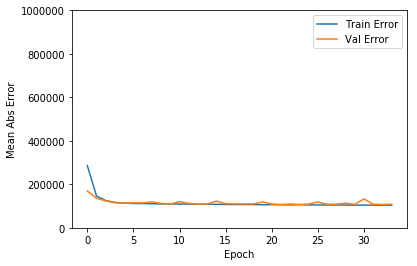

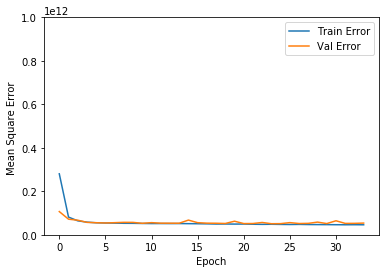

In [ ]:
model = build_model()
# a 10 habs y 1,25 mill
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 2000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))
#print("Testing set Root Mean Abs Error: {:5.2f} ".format(sqrt(mse))

Testing set Mean Abs Error: 109260.62 


Testing set Mean Abs Error: 185397.20  con 128, 64, 64, 1
Testing set Mean Abs Error: 184048.05  con 128 128 64 1
Testing set Mean Abs Error: 180352.69  con 128 128 64 64 1
Testing set Mean Abs Error: 180541.22  con 128 128 64 32 1
Testing set Mean Abs Error: 180025.14  con 256 128 64 64 1
Testing set Mean Abs Error: 158114.89 con 256 128 128 64 64 1
Testing set Mean Abs Error:  148351.69 con 256 256 128 128 64 64 1
Testing set Mean Abs Error:   140090.22 con 256 128 128 128 128 64 64 1
Testing set Mean Abs Error:   135900.55 con 256 256 256 128 128 128 128 64 64 64 64 1
Testing set Mean Abs Error:  137792.30 con 256 128 128 64 64 1
Sin el zop
Testing set Mean Abs Error:   con 256 128 128 64 64 1
Testing set Mean Abs Error:   con 256 128 128 64 64 1
Testing set Mean Abs Error: 126064.98 con crim etc
Testing set Mean Abs Error: 44887.71 con absolutamente todo incluida amtriz de vecindad y limitada a 750
Testing set Mean Abs Error: 105937.41  con todo sin limitar 4 por cada en red neuronal
Testing set Mean Abs Error: 103383.42 

In [ ]:
all_price_sum = train_labels.sum()+test_labels.sum()
Number_of_prices = train_labels.size+test_labels.size  #number of all labels
print(all_price_sum)
print(Number_of_prices)
print("Average of prices of all the data = ",all_price_sum/Number_of_prices)

11215858960.0
19810
Average of prices of all the data =  566171.5779909136


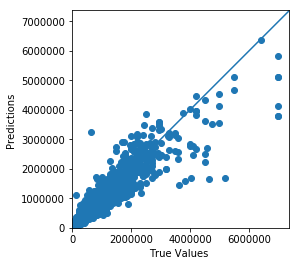

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 1000000000], [-100, 1000000000])


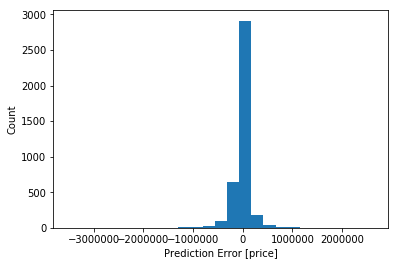

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [price]")
_ = plt.ylabel("Count")

In [ ]:
Xnew = np.array([[3, 80, 2, 62]]) #,0.6, 31063.4, 1406, 141569]])
ynew=model.predict(Xnew)
print(ynew/100)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))